# Camera Stream Analysis

The idea here is to take a look how the participant uses the 3 available camera streams over time when using the headset.

[1. One specific participant for one trial](#1)

[2. One random participant for all trials](#2)

[3. General analysis for one participant](#3)

[4. General analysis for all participants](#4)

# 1. One individual participant for one trial <a id='1'></a>

In [2]:
import os
import pandas as pd

# Define the base path for the data
base_path = r"E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data"

# Define the controllers and modalities
controllers = ["WBC", "CHIRON"]

# Display all possible participants and trials
for controller in controllers:
    print(f"Controller: {controller}")
    controller_path = os.path.join(base_path, controller)
    for modality in ["WITH-VR", "NO-VR"]:
        modality_path = os.path.join(controller_path, modality)
        participants = [
            p for p in os.listdir(modality_path)
            if os.path.isdir(os.path.join(modality_path, p))
        ]
        print(f"  Modality: {modality}")
        print(f"    Participants: {participants}")

# Let the user choose a controller, participant, and trial
selected_controller = input("Enter the controller (WBC or CHIRON): ")
selected_modality = input("Enter the modality (WITH-VR or NO-VR): ")
modality_path = os.path.join(base_path, selected_controller, selected_modality)

participants = [
    p for p in os.listdir(modality_path)
    if os.path.isdir(os.path.join(modality_path, p))
]
selected_participant = input(f"Enter the participant code from {participants}: ")

participant_path = os.path.join(modality_path, selected_participant, "CSVS")
trials = [
    t for t in os.listdir(participant_path)
    if "WITH-VR" in t and "SIM" not in t and os.path.isdir(os.path.join(participant_path, t))
]
print(f"Trials for {selected_participant}: {trials}")
selected_trial = input(f"Enter the trial name from {trials}: ")

# Correct the trial path to directly reference the trial folder
trial_path = os.path.join(participant_path, selected_trial)
csv_path = os.path.join(trial_path, "camera_view.csv")
subtask_csv = os.path.join(trial_path, "subtask_topic.csv")
print(csv_path)

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print("Data loaded successfully.")
else:
    print("camera_view.csv not found. Ensure the trial folder path is correct and contains the expected file.")
    
if os.path.exists(subtask_csv):
    subtask_df = pd.read_csv(subtask_csv)
    print("Subtask Data loaded successfully.")
else:
    print("subtask_topic.csv not found. Ensure the trial folder path is correct and contains the expected file.")


Controller: WBC
  Modality: WITH-VR
    Participants: ['DOFS27', 'IICM04', 'LEMT02', 'MGNH15', 'NRKH02']
  Modality: NO-VR
    Participants: ['ARAH22', 'BTHH23', 'ELBH19', 'REKD03', 'SASD12']
Controller: CHIRON
  Modality: WITH-VR
    Participants: ['AAHF21', 'ATSF08', 'DAMA12', 'RENL05', 'EECW29']
  Modality: NO-VR
    Participants: ['HASJ22', 'DOCS21', 'CEEJ05', 'NULS22', 'XHKB15']


Enter the controller (WBC or CHIRON):  WBC
Enter the modality (WITH-VR or NO-VR):  WITH-VR
Enter the participant code from ['DOFS27', 'IICM04', 'LEMT02', 'MGNH15', 'NRKH02']:  DOFS27


Trials for DOFS27: ['DOFS27-RW-WITH-VR-TRIAL-2-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-1-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG']


Enter the trial name from ['DOFS27-RW-WITH-VR-TRIAL-2-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-1-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG']:  DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG


E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\DOFS27\CSVS\DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG\camera_view.csv
Data loaded successfully.
Subtask Data loaded successfully.


In [3]:
df

,Time,data
0,1.733499e+09,zedC
1,1.733499e+09,zedC
2,1.733499e+09,zedC
3,1.733499e+09,zedC
4,1.733499e+09,zedC
...,...,...
1367,1.733499e+09,zedC
1368,1.733499e+09,zedC
1369,1.733499e+09,zedC
1370,1.733499e+09,zedC


In [5]:
unique_values = df['data'].unique()
print("Unique values in the 'data' column:", unique_values)

Unique values in the 'data' column: ['zedA' 'zedC' 'zedB']


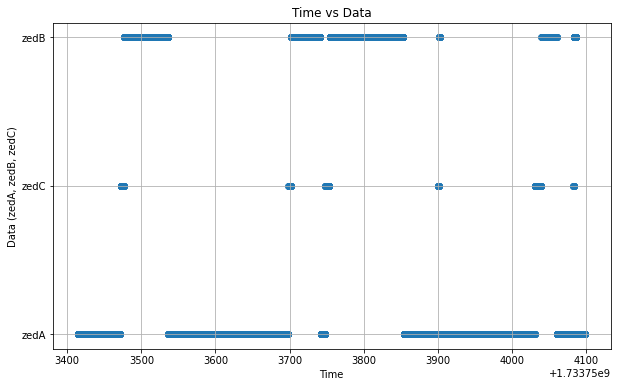

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]
plt.scatter(df_filtered["Time"], df_filtered["data"])
plt.xlabel("Time")
plt.ylabel("Data (zedA, zedB, zedC)")
plt.title("Time vs Data")
plt.grid(True)
plt.show()

In [7]:
df_filtered

,Time,data
0,1.733753e+09,zedA
1,1.733753e+09,zedA
2,1.733753e+09,zedA
3,1.733753e+09,zedA
4,1.733753e+09,zedA
...,...,...
6794,1.733754e+09,zedA
6795,1.733754e+09,zedA
6796,1.733754e+09,zedA
6797,1.733754e+09,zedA


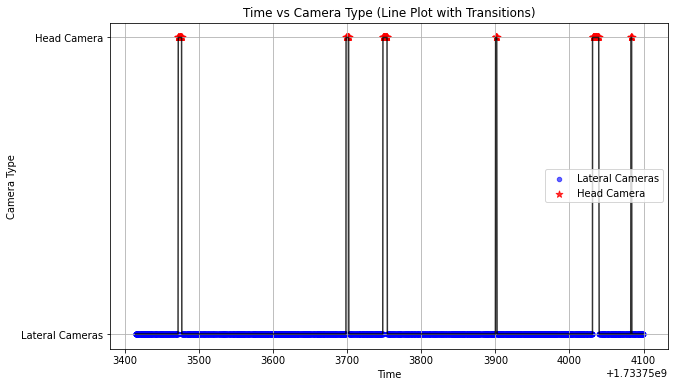

In [8]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only the relevant values
df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

# Replace the values in the "data" column for better visualization
df_filtered["data"] = df_filtered["data"].replace({
    "zedA": "Lateral Cameras",
    "zedB": "Lateral Cameras",
    "zedC": "Head Camera"
})

# Map the categorical values to numeric indices for plotting
category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the transitions
plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

# Highlight the points for Lateral Cameras and Head Camera
plt.scatter(
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
    color="blue", s=20, label="Lateral Cameras", alpha=0.6
)
plt.scatter(
    df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
    df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
    color="red", s=50, marker="*", label="Head Camera", alpha=0.8
)

# Set y-ticks to display categories
plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Camera Type")
plt.title("Time vs Camera Type (Line Plot with Transitions)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Now merging the camera stream with the tasks

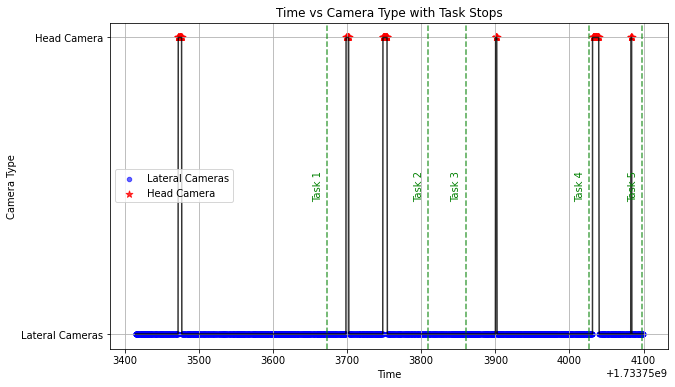

In [34]:


# Filter the subtask_topic DataFrame
if len(subtask_df) == 6:  # If there are 6 rows, exclude the second row
    task_times = subtask_df.drop(index=1)["Time"].values
else:
    task_times = subtask_df["Time"].values

# Filter the camera_view DataFrame to include only relevant values
df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

# Replace the values in the "data" column for better visualization
df_filtered["data"] = df_filtered["data"].replace({
    "zedA": "Lateral Cameras",
    "zedB": "Lateral Cameras",
    "zedC": "Head Camera"
})

# Map the categorical values to numeric indices for plotting
category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the transitions
plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

# Highlight the points for Lateral Cameras and Head Camera
plt.scatter(
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
    color="blue", s=20, label="Lateral Cameras", alpha=0.6
)
plt.scatter(
    df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
    df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
    color="red", s=50, marker="*", label="Head Camera", alpha=0.8
)

# Add vertical lines and annotations for task stops
for i, task_time in enumerate(task_times, start=1):
    plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)
    # Position annotation in the middle of the vertical line and shift it to the left
    middle_y = (max(category_mapping.values()) + min(category_mapping.values())) / 2
    plt.text(task_time - 0.008 * (df_filtered["Time"].max() - df_filtered["Time"].min()),  # Shift left by 2% of the time range
             middle_y,  # Adjust offset to lower the text slightly
             f"Task {i}", color="green", fontsize=10, rotation=90, verticalalignment="center", horizontalalignment="right")

# Set y-ticks to display categories
plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Camera Type")
plt.title("Time vs Camera Type with Task Stops")

# Avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Add grid
plt.grid(True)

# Show plot
plt.show()


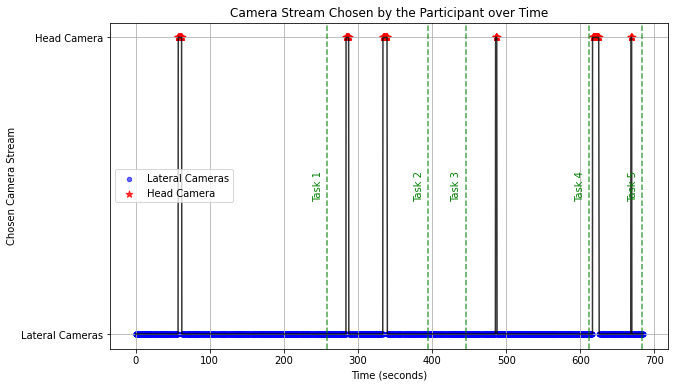

In [35]:
# Adjust the Time column to start from 0
initial_time = df_filtered["Time"].min()
df_filtered["Time"] = df_filtered["Time"] - initial_time
task_times = task_times - initial_time  # Adjust task_times similarly

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the transitions
plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

# Highlight the points for Lateral Cameras and Head Camera
plt.scatter(
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
    color="blue", s=20, label="Lateral Cameras", alpha=0.6
)
plt.scatter(
    df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
    df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
    color="red", s=50, marker="*", label="Head Camera", alpha=0.8
)

# Add vertical lines and annotations for task stops
for i, task_time in enumerate(task_times, start=1):
    plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)
    # Position annotation in the middle of the vertical line and shift it to the left
    middle_y = (max(category_mapping.values()) + min(category_mapping.values())) / 2
    plt.text(task_time - 0.008 * (df_filtered["Time"].max() - df_filtered["Time"].min()),  # Shift left by 2% of the time range
             middle_y,  # Position the annotation
             f"Task {i}", color="green", fontsize=10, rotation=90, verticalalignment="center", horizontalalignment="right")

# Set y-ticks to display categories
plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Chosen Camera Stream")
plt.title("Camera Stream Chosen by the Participant over Time")

# Avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Add grid
plt.grid(True)

# Show plot
plt.show()


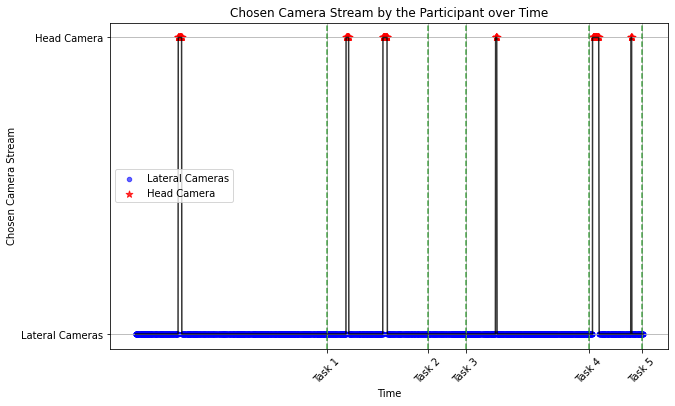

In [27]:
# Filter the subtask_topic DataFrame
if len(subtask_df) == 6:  # If there are 6 rows, exclude the second row
    task_times = subtask_df.drop(index=1)["Time"].values
else:
    task_times = subtask_df["Time"].values

# Filter the camera_view DataFrame to include only relevant values
df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

# Replace the values in the "data" column for better visualization
df_filtered["data"] = df_filtered["data"].replace({
    "zedA": "Lateral Cameras",
    "zedB": "Lateral Cameras",
    "zedC": "Head Camera"
})

# Map the categorical values to numeric indices for plotting
category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the transitions
plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

# Highlight the points for Lateral Cameras and Head Camera
plt.scatter(
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
    df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
    color="blue", s=20, label="Lateral Cameras", alpha=0.6
)
plt.scatter(
    df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
    df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
    color="red", s=50, marker="*", label="Head Camera", alpha=0.8
)

# Add vertical lines for task stops
for task_time in task_times:
    plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)

# Set custom x-ticks for task labels
task_labels = [f"Task {i+1}" for i in range(len(task_times))]
plt.xticks(task_times, task_labels, rotation=45, fontsize=10)  # Rotate for better readability

# Set y-ticks to display categories
plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Chosen Camera Stream")
plt.title("Chosen Camera Stream by the Participant over Time")

# Avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Add grid
plt.grid(True)

# Show plot
plt.show()


# 2. One random participant for all trials <a id='1'></a>

Randomly selected participant: NRKH02 (Controller: WBC)
Available trials: ['NRKH02-RW-WITH-VR-TRIAL-3-ROSBAG', 'NRKH02-RW-WITH-VR-TRIAL-1-ROSBAG', 'NRKH02-RW-WITH-VR-TRIAL-2-ROSBAG']


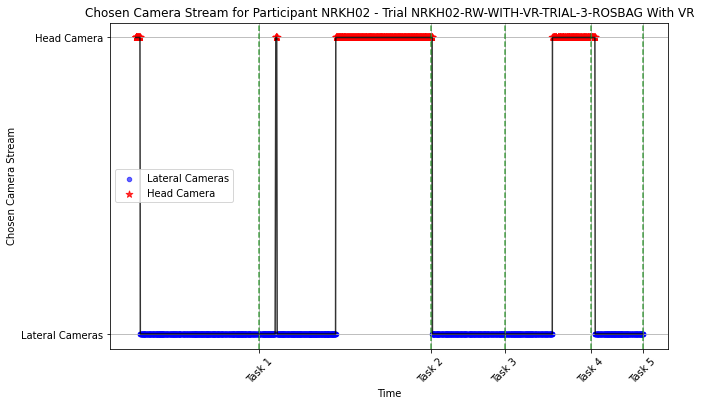

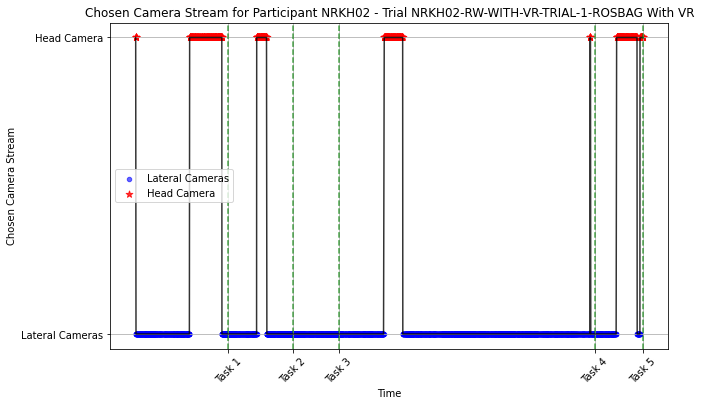

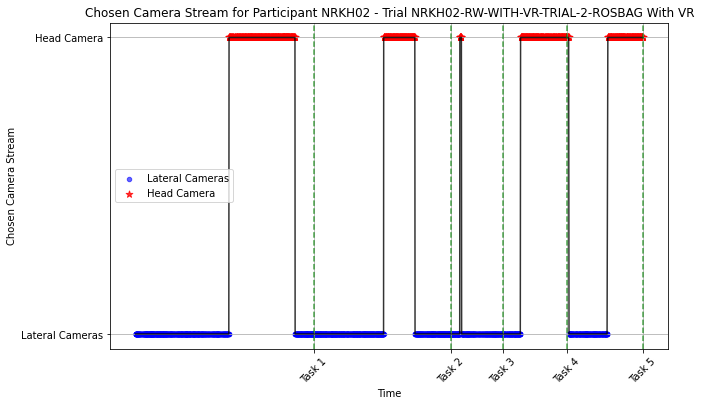

In [46]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt

# Define the base path for the data
base_path = r"E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data"

# Define the controllers and modalities
controllers = ["WBC", "CHIRON"]

# Gather all available participants for WITH-VR trials
all_participants = []

for controller in controllers:
    controller_path = os.path.join(base_path, controller)
    modality_path = os.path.join(controller_path, "WITH-VR")
    participants = [
        p for p in os.listdir(modality_path)
        if os.path.isdir(os.path.join(modality_path, p))
    ]
    for participant in participants:
        participant_path = os.path.join(modality_path, participant, "CSVS")
        trials = [
            t for t in os.listdir(participant_path)
            if "WITH-VR" in t and "SIM" not in t and os.path.isdir(os.path.join(participant_path, t))
        ]
        all_participants.append((controller, participant, trials))

# Randomly select a participant and their trials
if not all_participants:
    print("No participants found for WITH-VR trials.")
else:
    selected_controller, selected_participant, available_trials = random.choice(all_participants)
    print(f"Randomly selected participant: {selected_participant} (Controller: {selected_controller})")
    print(f"Available trials: {available_trials}")

    # Process and plot data for each trial
    for trial in available_trials:
        trial_path = os.path.join(base_path, selected_controller, "WITH-VR", selected_participant, "CSVS", trial)
        
        # Load the CSV files
        subtask_csv = os.path.join(trial_path, "subtask_topic.csv")
        camera_csv = os.path.join(trial_path, "camera_view.csv")
        
        if os.path.exists(subtask_csv):
            subtask_df = pd.read_csv(subtask_csv)
        else:
            print(f"subtask_topic.csv not found for trial {trial}. Skipping.")
            continue

        if os.path.exists(camera_csv):
            df = pd.read_csv(camera_csv)
        else:
            print(f"camera_view.csv not found for trial {trial}. Skipping.")
            continue
        
        # Filter the subtask_topic DataFrame
        if len(subtask_df) == 6:  # If there are 6 rows, exclude the second row
            task_times = subtask_df.drop(index=1)["Time"].values
        else:
            task_times = subtask_df["Time"].values

        # Filter the camera_view DataFrame to include only relevant values
        df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

        # Replace the values in the "data" column for better visualization
        df_filtered["data"] = df_filtered["data"].replace({
            "zedA": "Lateral Cameras",
            "zedB": "Lateral Cameras",
            "zedC": "Head Camera"
        })

        # Map the categorical values to numeric indices for plotting
        category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
        df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)

        # Create the line plot
        plt.figure(figsize=(10, 6))

        # Plot the transitions
        plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

        # Highlight the points for Lateral Cameras and Head Camera
        plt.scatter(
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
            color="blue", s=20, label="Lateral Cameras", alpha=0.6
        )
        plt.scatter(
            df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
            df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
            color="red", s=50, marker="*", label="Head Camera", alpha=0.8
        )

        # Add vertical lines for task stops
        for task_time in task_times:
            plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)

        # Set custom x-ticks for task labels
        task_labels = [f"Task {i+1}" for i in range(len(task_times))]
        plt.xticks(task_times, task_labels, rotation=45, fontsize=10)  # Rotate for better readability

        # Set y-ticks to display categories
        plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

        # Add labels and title
        plt.xlabel("Time")
        plt.ylabel("Chosen Camera Stream")
        plt.title(f'Chosen Camera Stream for Participant {selected_participant} - Trial {trial} With VR')

        # Avoid duplicate labels in the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        # Add grid
        plt.grid(True)

        # Show plot
        plt.show()



In [61]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt

# Define the base path for the data
base_path = r"E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data"

# Define the controllers and modalities
controllers = ["WBC", "CHIRON"]

start_modalities = ["WITH-VR","NO-VR"]

# Gather all available participants for WITH-VR trials
all_participants = []

for controller in controllers:
    controller_path = os.path.join(base_path, controller)
    for modality in start_modalities:
        modality_path = os.path.join(controller_path, modality)
        participants = [
            p for p in os.listdir(modality_path)
            if os.path.isdir(os.path.join(modality_path, p))
        ]
        for participant in participants:
            participant_path = os.path.join(modality_path, participant, "CSVS")
            trials = [
                t for t in os.listdir(participant_path)
                if "WITH-VR" in t and "SIM" not in t and os.path.isdir(os.path.join(participant_path, t))
            ]
            all_participants.append((controller,modality, participant, trials))

# Randomly select a participant and their trials
if not all_participants:
    print("No participants found for WITH-VR trials.")
else:
    selected_controller,selected_start_modality, selected_participant, available_trials = random.choice(all_participants)
    print(f"Randomly selected participant: {selected_participant} (Controller: {selected_controller})")
    print(f"Available trials: {available_trials}")

    # Process and plot data for each trial
    for trial in available_trials:
        trial_path = os.path.join(base_path, selected_controller,selected_start_modality, selected_participant, "CSVS", trial)
        
        # Extract the trial number from the trial name using split
        trial_number = trial.split('-TRIAL-')[1].split('-')[0]
        
        # Load the CSV files
        subtask_csv = os.path.join(trial_path, "subtask_topic.csv")
        camera_csv = os.path.join(trial_path, "camera_view.csv")
        
        print(subtask_csv)
        if os.path.exists(subtask_csv):
            subtask_df = pd.read_csv(subtask_csv)
        else:
            print(f"subtask_topic.csv not found for trial {trial}. Skipping.")
            continue

        if os.path.exists(camera_csv):
            df = pd.read_csv(camera_csv)
        else:
            print(f"camera_view.csv not found for trial {trial}. Skipping.")
            continue
        
        # Filter the subtask_topic DataFrame
        if len(subtask_df) == 6:  # If there are 6 rows, exclude the second row
            task_times = subtask_df.drop(index=1)["Time"].values
        else:
            task_times = subtask_df["Time"].values

        # Filter the camera_view DataFrame to include only relevant values
        df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

        # Replace the values in the "data" column for better visualization
        df_filtered["data"] = df_filtered["data"].replace({
            "zedA": "Lateral Cameras",
            "zedB": "Lateral Cameras",
            "zedC": "Head Camera"
        })

        # Map the categorical values to numeric indices for plotting
        category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
        df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)

        # Create the line plot
        plt.figure(figsize=(10, 6))

        # Plot the transitions
        plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

        # Highlight the points for Lateral Cameras and Head Camera
        plt.scatter(
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
            color="blue", s=20, label="Lateral Cameras", alpha=0.6
        )
        plt.scatter(
            df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
            df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
            color="red", s=50, marker="*", label="Head Camera", alpha=0.8
        )

        # Add vertical lines for task stops
        for task_time in task_times:
            plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)

        # Set custom x-ticks for task labels
        task_labels = [f"Task {i+1}" for i in range(len(task_times))]
        plt.xticks(task_times, task_labels, rotation=45, fontsize=10)  # Rotate for better readability

        # Set y-ticks to display categories
        plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

        # Add labels and title
        plt.xlabel("Time")
        plt.ylabel("Chosen Camera Stream")
        plt.title(f'Chosen Camera Stream for Participant {selected_participant} - Trial {trial_number} (With VR) for {selected_controller}')

        # Avoid duplicate labels in the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        # Add grid
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"camera_{selected_participant}_trial_{trial}.pdf", format='pdf')

        # Show plot
        plt.show()


Randomly selected participant: XHKB15 (Controller: CHIRON)
Available trials: ['XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG', 'XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG', 'XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG. Skipping.


Selected participant: DOFS27 (Controller: WBC)
Available trials: ['DOFS27-RW-WITH-VR-TRIAL-2-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-1-ROSBAG', 'DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\DOFS27\CSVS\DOFS27-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


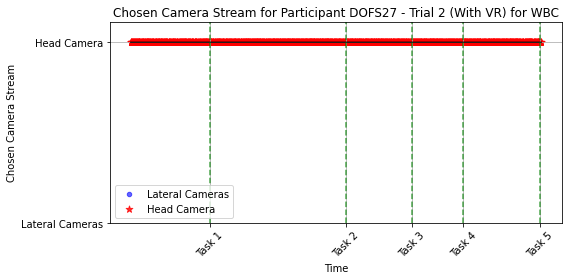

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\DOFS27\CSVS\DOFS27-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


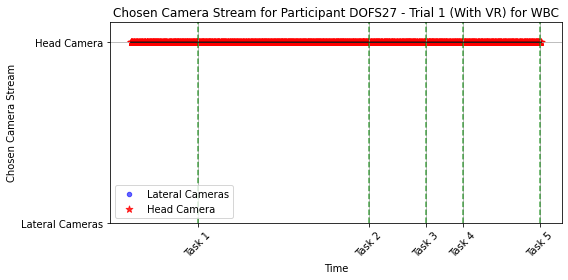

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\DOFS27\CSVS\DOFS27-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


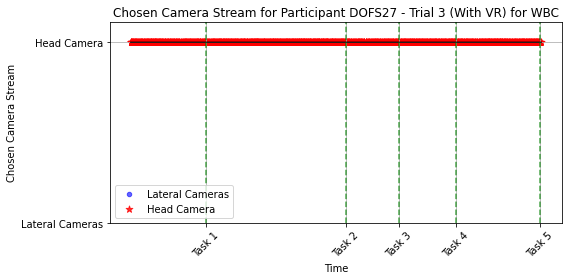

Selected participant: IICM04 (Controller: WBC)
Available trials: ['IICM04-RW-WITH-VR-TRIAL-3-ROSBAG', 'IICM04-RW-WITH-VR-TRIAL-2-ROSBAG', 'IICM04-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\IICM04\CSVS\IICM04-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


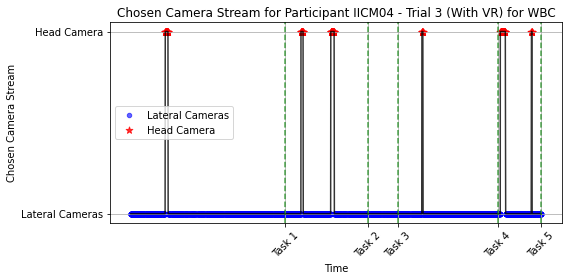

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\IICM04\CSVS\IICM04-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


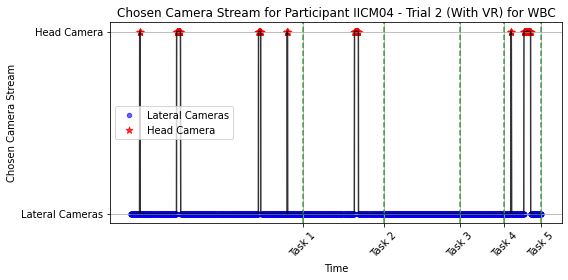

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\IICM04\CSVS\IICM04-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


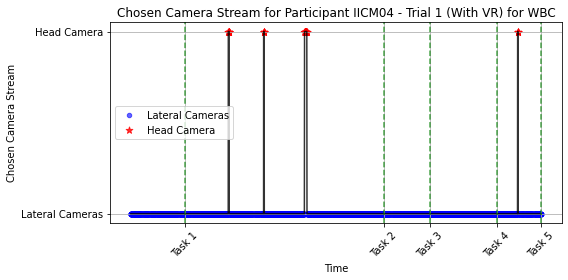

Selected participant: LEMT02 (Controller: WBC)
Available trials: ['LEMT02-RW-WITH-VR-TRIAL-1-ROSBAG', 'LEMT02-RW-WITH-VR-TRIAL-2-ROSBAG', 'LEMT02-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\LEMT02\CSVS\LEMT02-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


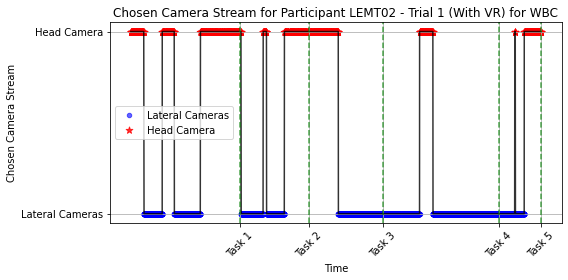

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\LEMT02\CSVS\LEMT02-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial LEMT02-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\LEMT02\CSVS\LEMT02-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial LEMT02-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
Selected participant: MGNH15 (Controller: WBC)
Available trials: ['MGNH15-RW-WITH-VR-TRIAL-3-ROSBAG', 'MGNH15-RW-WITH-VR-TRIAL-1-ROSBAG', 'MGNH15-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\MGNH15\CSVS\MGNH15-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


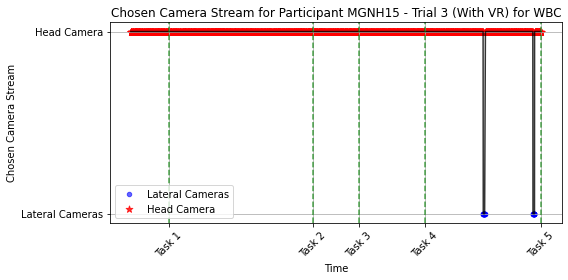

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\MGNH15\CSVS\MGNH15-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


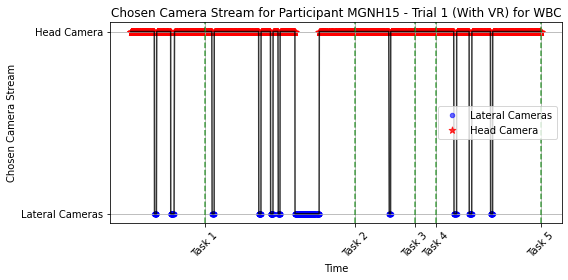

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\MGNH15\CSVS\MGNH15-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


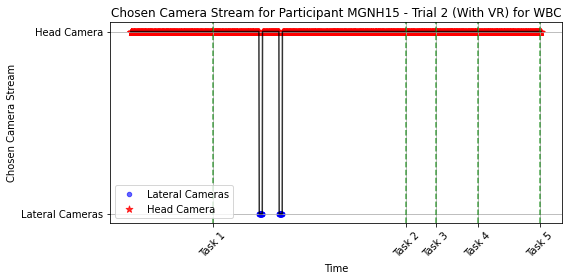

Selected participant: NRKH02 (Controller: WBC)
Available trials: ['NRKH02-RW-WITH-VR-TRIAL-3-ROSBAG', 'NRKH02-RW-WITH-VR-TRIAL-1-ROSBAG', 'NRKH02-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\NRKH02\CSVS\NRKH02-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


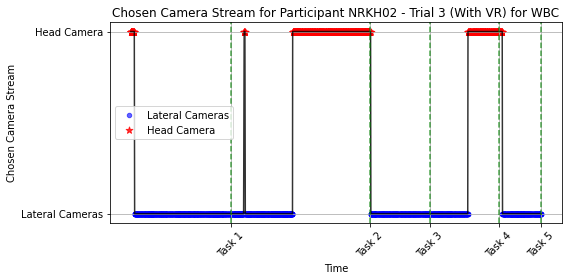

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\NRKH02\CSVS\NRKH02-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


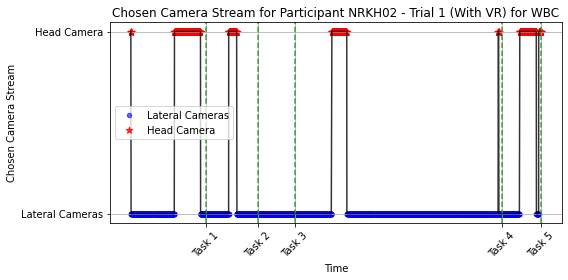

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\NRKH02\CSVS\NRKH02-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


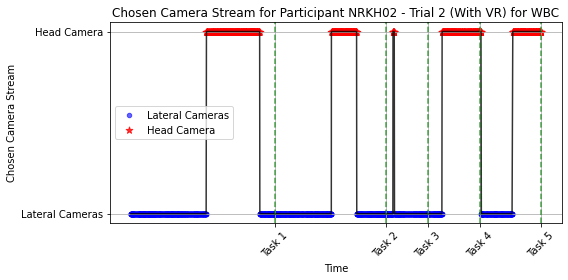

Selected participant: ARAH22 (Controller: WBC)
Available trials: ['ARAH22-RW-WITH-VR-TRIAL-1-ROSBAG', 'ARAH22-RW-WITH-VR-TRIAL-2-ROSBAG', 'ARAH22-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ARAH22\CSVS\ARAH22-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


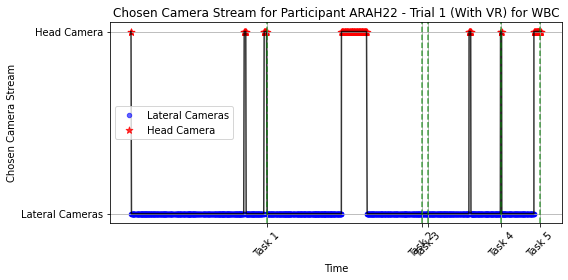

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ARAH22\CSVS\ARAH22-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


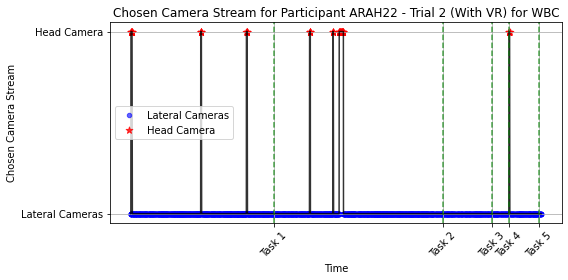

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ARAH22\CSVS\ARAH22-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


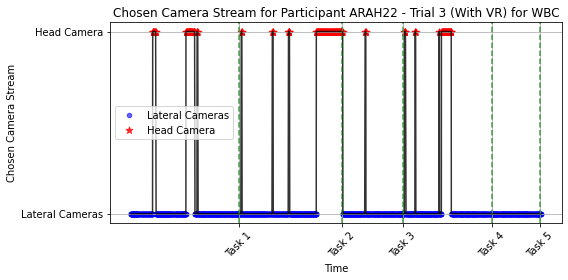

Selected participant: BTHH23 (Controller: WBC)
Available trials: ['BTHH23-RW-WITH-VR-TRIAL-1-ROSBAG', 'BTHH23-RW-WITH-VR-TRIAL-3-ROSBAG', 'BTHH23-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\BTHH23\CSVS\BTHH23-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


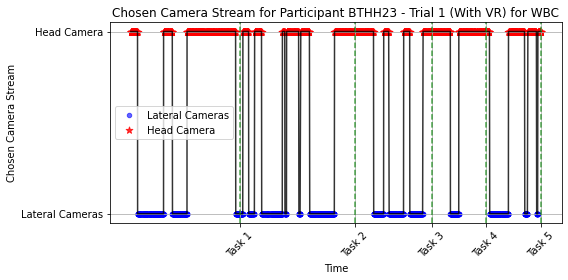

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\BTHH23\CSVS\BTHH23-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


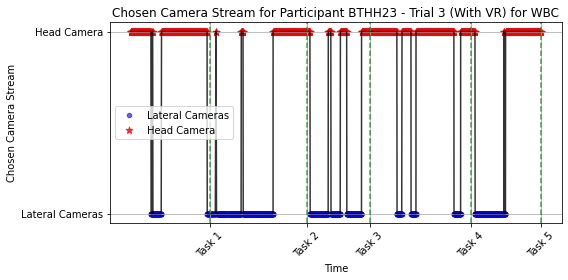

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\BTHH23\CSVS\BTHH23-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


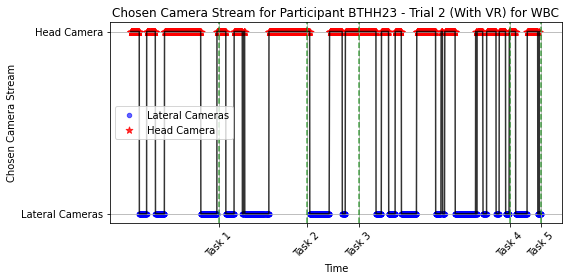

Selected participant: ELBH19 (Controller: WBC)
Available trials: ['ELBH19-RW-WITH-VR-TRIAL-2-ROSBAG', 'ELBH19-RW-WITH-VR-TRIAL-3-ROSBAG', 'ELBH19-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ELBH19\CSVS\ELBH19-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


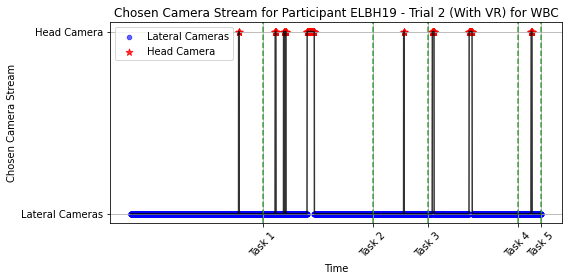

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ELBH19\CSVS\ELBH19-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


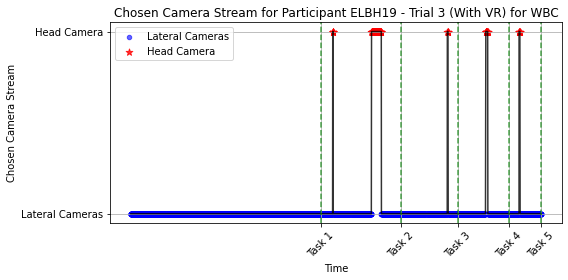

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\ELBH19\CSVS\ELBH19-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


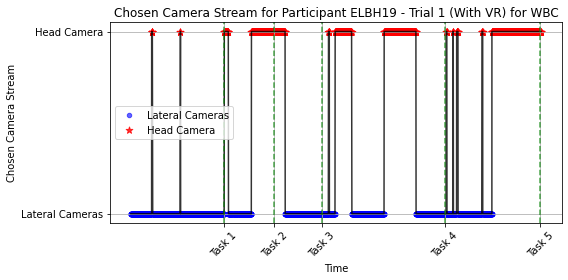

Selected participant: REKD03 (Controller: WBC)
Available trials: ['REKD03-RW-WITH-VR-TRIAL-2-ROSBAG', 'REKD03-RW-WITH-VR-TRIAL-1-ROSBAG', 'REKD03-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\REKD03\CSVS\REKD03-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial REKD03-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\REKD03\CSVS\REKD03-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial REKD03-RW-WITH-VR-TRIAL-1-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\REKD03\CSVS\REKD03-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial REKD03-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
Selected participant: SASD12 (Controller: WBC)
Available trials: ['SASD12-RW-WITH-VR-TRIAL-3-ROSBAG', 'SASD12-RW-WITH-VR-TRIAL-1-ROSBAG', 'SASD12-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_ST

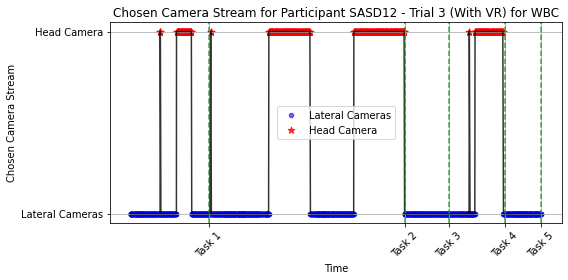

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\SASD12\CSVS\SASD12-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


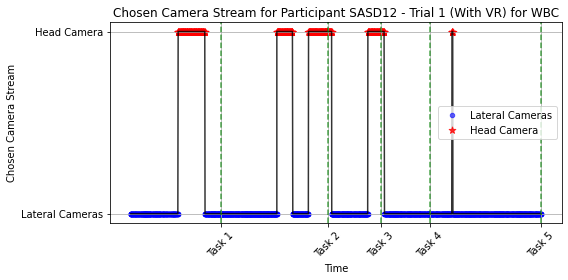

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\NO-VR\SASD12\CSVS\SASD12-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


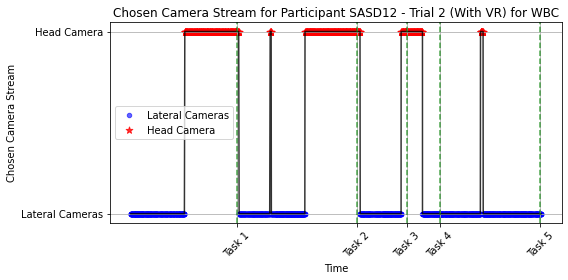

Selected participant: AAHF21 (Controller: CHIRON)
Available trials: ['AAHF21-RW-WITH-VR-TRIAL-2-ROSBAG', 'AAHF21-RW-WITH-VR-TRIAL-1-ROSBAG', 'AAHF21-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\AAHF21\CSVS\AAHF21-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial AAHF21-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\AAHF21\CSVS\AAHF21-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial AAHF21-RW-WITH-VR-TRIAL-1-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\AAHF21\CSVS\AAHF21-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial AAHF21-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
Selected participant: ATSF08 (Controller: CHIRON)
Available trials: ['ATSF08-RW-WITH-VR-TRIAL-3-ROSBAG', 'ATSF08-RW-WITH-VR-TRIAL-1-ROSBAG', 'ATSF08-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\Serifo

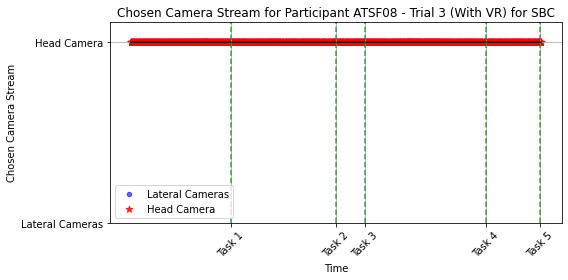

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\ATSF08\CSVS\ATSF08-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


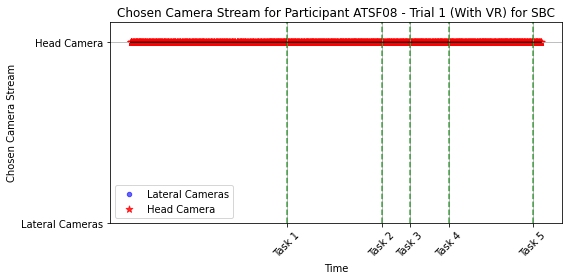

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\ATSF08\CSVS\ATSF08-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


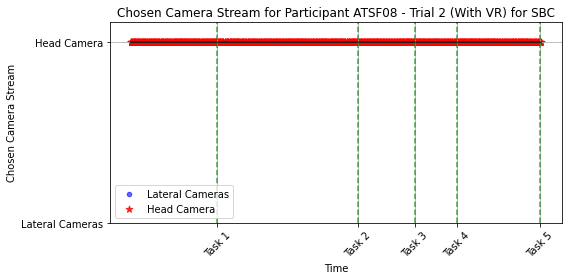

Selected participant: DAMA12 (Controller: CHIRON)
Available trials: ['DAMA12-RW-WITH-VR-TRIAL-2-ROSBAG', 'DAMA12-RW-WITH-VR-TRIAL-3-ROSBAG', 'DAMA12-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\DAMA12\CSVS\DAMA12-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


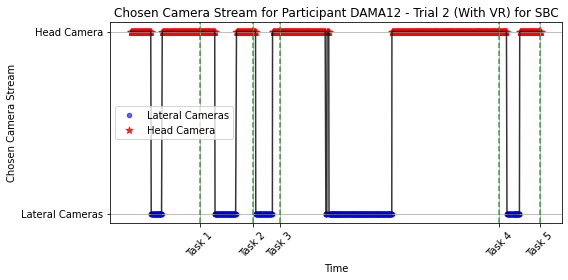

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\DAMA12\CSVS\DAMA12-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


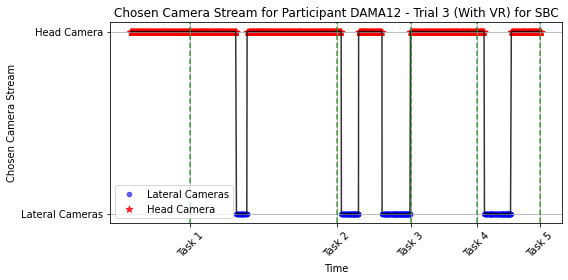

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\DAMA12\CSVS\DAMA12-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


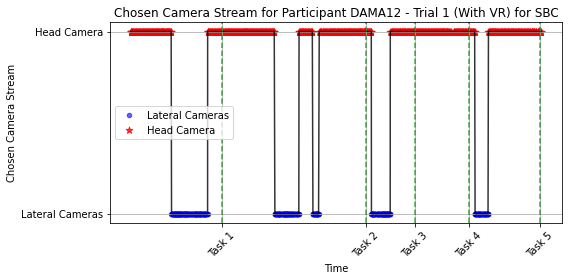

Selected participant: RENL05 (Controller: CHIRON)
Available trials: ['RENL05-RW-WITH-VR-TRIAL-3-ROSBAG', 'RENL05-RW-WITH-VR-TRIAL-1-ROSBAG', 'RENL05-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\RENL05\CSVS\RENL05-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


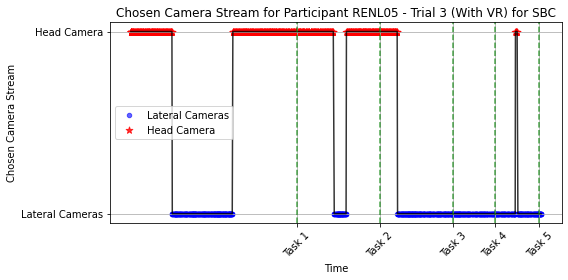

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\RENL05\CSVS\RENL05-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


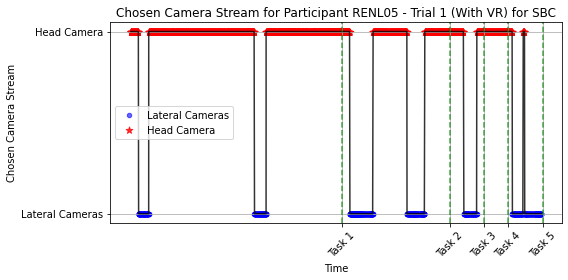

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\RENL05\CSVS\RENL05-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


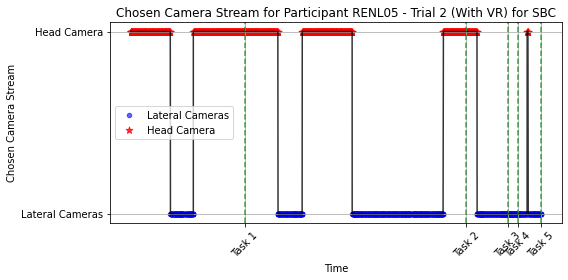

Selected participant: EECW29 (Controller: CHIRON)
Available trials: ['EECW29-RW-WITH-VR-TRIAL-2-ROSBAG', 'EECW29-RW-WITH-VR-TRIAL-3-ROSBAG', 'EECW29-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\EECW29\CSVS\EECW29-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


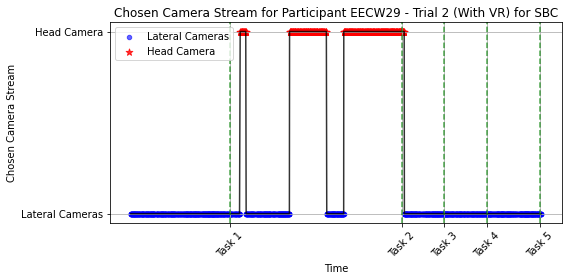

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\EECW29\CSVS\EECW29-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


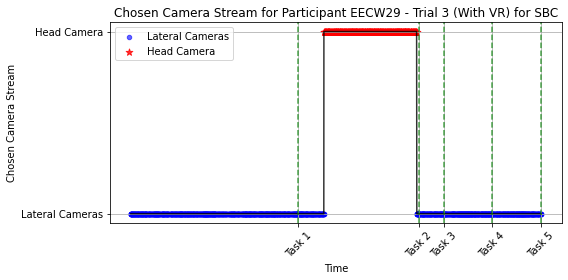

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\EECW29\CSVS\EECW29-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


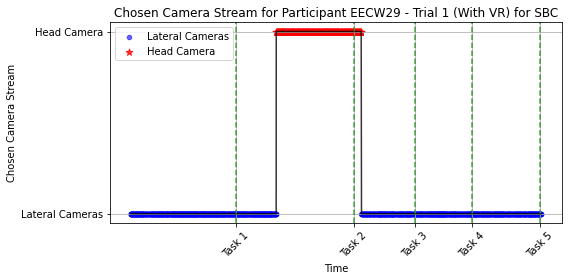

Selected participant: HASJ22 (Controller: CHIRON)
Available trials: ['HASJ22-RW-WITH-VR-TRIAL-2-ROSBAG', 'HASJ22-RW-WITH-VR-TRIAL-1-ROSBAG', 'HASJ22-RW-WITH-VR-TRIAL-3-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial HASJ22-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial HASJ22-RW-WITH-VR-TRIAL-1-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
camera_view.csv not found for trial HASJ22-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
Selected participant: DOCS21 (Controller: CHIRON)
Available trials: ['DOCS21-RW-WITH-VR-TRIAL-1-ROSBAG', 'DOCS21-RW-WITH-VR-TRIAL-3-ROSBAG', 'DOCS21-RW-WITH-VR-TRIAL-2-ROSBAG']
E:\Hydra\sophia_ws\SerifosUploa

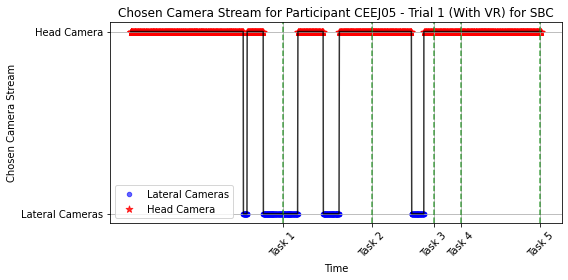

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\CEEJ05\CSVS\CEEJ05-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


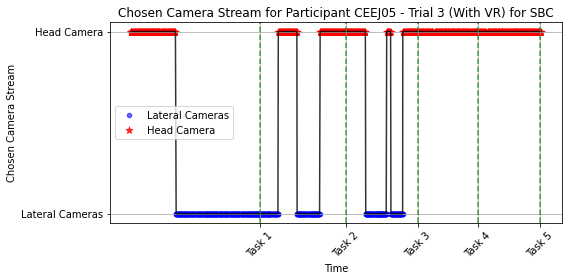

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\CEEJ05\CSVS\CEEJ05-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


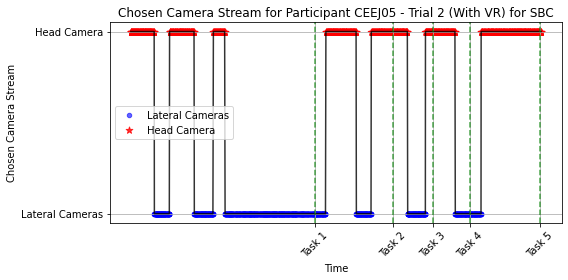

Selected participant: NULS22 (Controller: CHIRON)
Available trials: ['NULS22-RW-WITH-VR-TRIAL-2-ROSBAG', 'NULS22-RW-WITH-VR-TRIAL-3-ROSBAG', 'NULS22-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\NULS22\CSVS\NULS22-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv


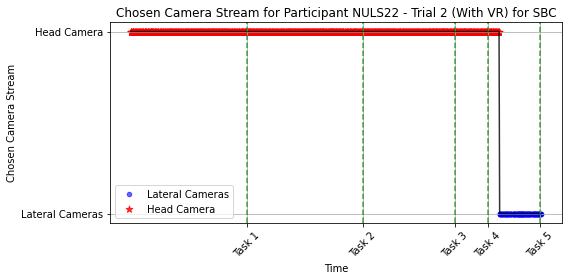

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\NULS22\CSVS\NULS22-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv


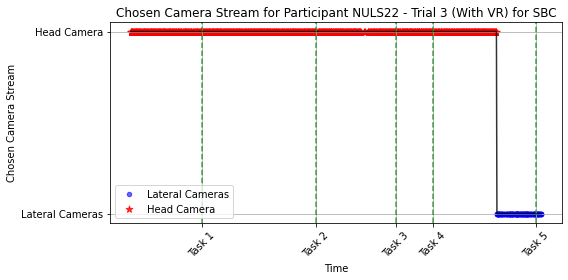

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\NULS22\CSVS\NULS22-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv


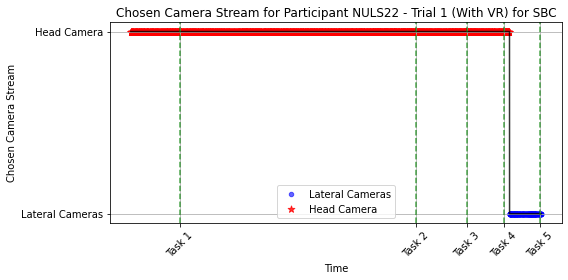

Selected participant: XHKB15 (Controller: CHIRON)
Available trials: ['XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG', 'XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG', 'XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG']
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-3-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-2-ROSBAG. Skipping.
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\XHKB15\CSVS\XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG\subtask_topic.csv
subtask_topic.csv not found for trial XHKB15-RW-WITH-VR-TRIAL-1-ROSBAG. Skipping.


In [141]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt

# Define the base path for the data
base_path = r"E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data"

# Define the controllers and modalities
controllers = ["WBC", "CHIRON"]

start_modalities = ["WITH-VR","NO-VR"]

# Gather all available participants for WITH-VR trials
all_participants = []

for controller in controllers:
    controller_path = os.path.join(base_path, controller)
    for modality in start_modalities:
        modality_path = os.path.join(controller_path, modality)
        participants = [
            p for p in os.listdir(modality_path)
            if os.path.isdir(os.path.join(modality_path, p))
        ]
        for participant in participants:
            participant_path = os.path.join(modality_path, participant, "CSVS")
            trials = [
                t for t in os.listdir(participant_path)
                if "WITH-VR" in t and "SIM" not in t and os.path.isdir(os.path.join(participant_path, t))
            ]
            all_participants.append((controller,modality, participant, trials))

# Randomly select a participant and their trials

# Initialize lists to store percentages
head_df = pd.DataFrame(columns=[f"Task {i}" for i in range(1, 6)])
head_df_wbc = pd.DataFrame(columns=[f"Task {i}" for i in range(1, 6)])
head_df_sbc = pd.DataFrame(columns=[f"Task {i}" for i in range(1, 6)])

for participant in all_participants:
    
    selected_controller,selected_start_modality, selected_participant, available_trials = participant
    print(f"Selected participant: {selected_participant} (Controller: {selected_controller})")
    print(f"Available trials: {available_trials}")
    
    if selected_participant == "MGNH15":
        lista_mgnh = []

    # Process and plot data for each trial
    for trial in available_trials:
        trial_path = os.path.join(base_path, selected_controller,selected_start_modality, selected_participant, "CSVS", trial)
        
        # Extract the trial number from the trial name using split
        trial_number = trial.split('-TRIAL-')[1].split('-')[0]
        
        # Load the CSV files
        subtask_csv = os.path.join(trial_path, "subtask_topic.csv")
        camera_csv = os.path.join(trial_path, "camera_view.csv")
        
        # Checking files
        print(subtask_csv)
        if os.path.exists(subtask_csv):
            subtask_df = pd.read_csv(subtask_csv)
        else:
            print(f"subtask_topic.csv not found for trial {trial}. Skipping.")
            continue

        if os.path.exists(camera_csv):
            df = pd.read_csv(camera_csv)
        else:
            print(f"camera_view.csv not found for trial {trial}. Skipping.")
            continue
        
        # Filter the subtask_topic DataFrame
        if len(subtask_df) == 6:  # If there are 6 rows, exclude the second row
            task_times = subtask_df.drop(index=1)["Time"].values
        else:
            task_times = subtask_df["Time"].values

        # Filter the camera_view DataFrame to include only relevant values
        df_filtered = df[df["data"].isin(["zedA", "zedB", "zedC"])]

        # Replace the values in the "data" column for better visualization
        df_filtered["data"] = df_filtered["data"].replace({
            "zedA": "Lateral Cameras",
            "zedB": "Lateral Cameras",
            "zedC": "Head Camera"
        })

        # Map the categorical values to numeric indices for plotting
        category_mapping = {"Lateral Cameras": 1, "Head Camera": 2}
        df_filtered["data_numeric"] = df_filtered["data"].map(category_mapping)
        
        # Initialize the "Task" column
        df_filtered["Task"] = 0

        # Assign task numbers based on the Time column
        for i, task_time in enumerate(task_times):
            if i == 0:
                df_filtered.loc[df_filtered["Time"] <= task_time, "Task"] = i + 1
            else:
                df_filtered.loc[(df_filtered["Time"] > task_times[i-1]) & (df_filtered["Time"] <= task_time), "Task"] = i + 1

        # Iterate over each task (1 to 5)
        head_camera_percentages = []
        for task_num in range(1, 6):
            df_task = df_filtered[df_filtered["Task"] == task_num]  # Filter for the specific task
            percentage = (df_task[df_task["data"] == "Head Camera"].shape[0] / df_task.shape[0]) * 100

            head_camera_percentages.append(percentage)
            
        if selected_participant == "MGNH15":
                lista_mgnh.append(head_camera_percentages)
        # Create the line plot
        plt.figure(figsize=(8, 4))

        # Plot the transitions
        plt.plot(df_filtered["Time"], df_filtered["data_numeric"], color="black", alpha=0.8, linewidth=1.5)

        # Highlight the points for Lateral Cameras and Head Camera
        plt.scatter(
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["Time"],
            df_filtered[df_filtered["data"] == "Lateral Cameras"]["data_numeric"],
            color="blue", s=20, label="Lateral Cameras", alpha=0.6
        )
        plt.scatter(
            df_filtered[df_filtered["data"] == "Head Camera"]["Time"],
            df_filtered[df_filtered["data"] == "Head Camera"]["data_numeric"],
            color="red", s=50, marker="*", label="Head Camera", alpha=0.8
        )

        # Add vertical lines for task stops
        for task_time in task_times:
            plt.axvline(x=task_time, color="green", linestyle="--", alpha=0.7)

        # Set custom x-ticks for task labels
        task_labels = [f"Task {i+1}" for i in range(len(task_times))]
        plt.xticks(task_times, task_labels, rotation=45, fontsize=10)  # Rotate for better readability

        # Set y-ticks to display categories
        plt.yticks(list(category_mapping.values()), list(category_mapping.keys()))

        # Add labels and title
        plt.xlabel("Time")
        plt.ylabel("Chosen Camera Stream")
        if selected_controller == "CHIRON":
            cont = "SBC"
        else:
            cont="WBC"
        plt.title(f'Chosen Camera Stream for Participant {selected_participant} - Trial {trial_number} (With VR) for {cont}')

        # Avoid duplicate labels in the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        # Add grid
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"camera_{selected_participant}_trial_{trial}.pdf", format='pdf')

        # Show plot
        plt.show()
        
        new_row = pd.DataFrame([head_camera_percentages], columns=[f"Task {i}" for i in range(1, 6)])
        head_df = pd.concat([head_df, new_row], ignore_index=True)
        if selected_controller == "WBC":
            head_df_wbc = pd.concat([head_df_wbc, new_row], ignore_index=True)
        else:
            head_df_sbc = pd.concat([head_df_sbc, new_row], ignore_index=True)
        
        trial_count += 1


In [120]:
head_camera_percentages

[100.0, 100.0, 100.0, 100.0, 11.781609195402298]

In [122]:
head_df.to_csv("head_df.csv")

In [123]:
head_df

,Task 1,Task 2,Task 3,Task 4,Task 5
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.000000,100.000000,100.000000,100.000000,100.000000
2,100.000000,100.000000,100.000000,100.000000,100.000000
3,1.189532,4.856688,0.000000,0.543478,8.862629
4,2.917981,3.164030,0.000000,0.000000,13.763066
5,0.000000,1.269394,0.000000,0.000000,0.710227
6,39.262934,22.467772,22.452504,5.638554,24.433657
7,100.000000,100.000000,100.000000,100.000000,95.754717
8,89.586305,68.622754,96.569468,100.000000,90.151515
9,100.000000,94.080000,100.000000,100.000000,100.000000


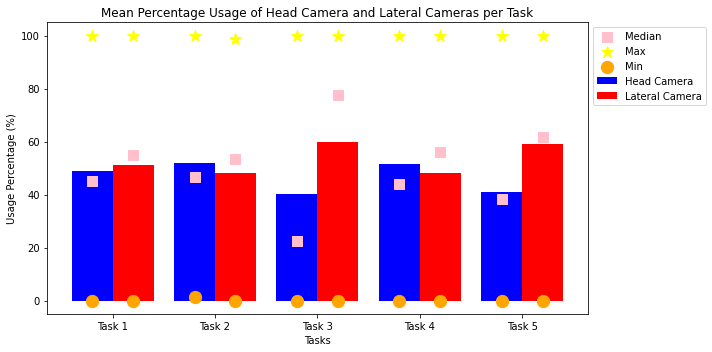

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Remove the "Unnamed" column if it exists (from saved CSV index)
head_df = head_df.loc[:, ~head_df.columns.str.contains('Unnamed')]

# Calculate mean percentages
mean_head_camera = head_df.mean()
mean_lateral_camera = 100 - mean_head_camera

# Calculate statistics for both Head Camera and Lateral Camera
median_head = head_df.median()
max_head = head_df.max()
min_head = head_df.min()

median_lateral = 100 - median_head
max_lateral = 100 - min_head  # Min head is max lateral
min_lateral = 100 - max_head  # Max head is min lateral

# Define x-axis labels (tasks)
tasks = mean_head_camera.index

# Define bar width
bar_width = 0.4
x = np.arange(len(tasks))  # X positions for bars

# Define common colors for markers
median_color = 'pink'
max_color = 'yellow'
min_color = 'orange'

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, mean_head_camera, width=bar_width, color='blue', label="Head Camera")
plt.bar(x + bar_width/2, mean_lateral_camera, width=bar_width, color='red', label="Lateral Camera")

# Plot statistics for both Head Camera and Lateral Camera
for i in range(len(tasks)):
    # Head Camera markers (left side)
    plt.scatter(x[i] - bar_width/2, median_head[i], marker='s', color=median_color, s=100, label="Median" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, max_head[i], marker='*', color=max_color, s=150, label="Max" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, min_head[i], marker='o', color=min_color, s=150, label="Min" if i == 0 else "", zorder=3)

    # Lateral Camera markers (right side)
    plt.scatter(x[i] + bar_width/2, median_lateral[i], marker='s', color=median_color, s=100, zorder=3)
    plt.scatter(x[i] + bar_width/2, max_lateral[i], marker='*', color=max_color, s=150, zorder=3)
    plt.scatter(x[i] + bar_width/2, min_lateral[i], marker='o', color=min_color, s=150, zorder=3)

# Add labels, title, and adjust scale
plt.xlabel("Tasks")
plt.ylabel("Usage Percentage (%)")
plt.title("Mean Percentage Usage of Head Camera and Lateral Cameras per Task")
plt.xticks(ticks=x, labels=tasks)
plt.ylim(-5, 105)  # Extend scale slightly above 100 and below 0 to make markers fully visible

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit legend
plt.tight_layout()
plt.tight_layout()
plt.savefig("mean_camera.pdf", format='pdf')

# Show the plot
plt.show()


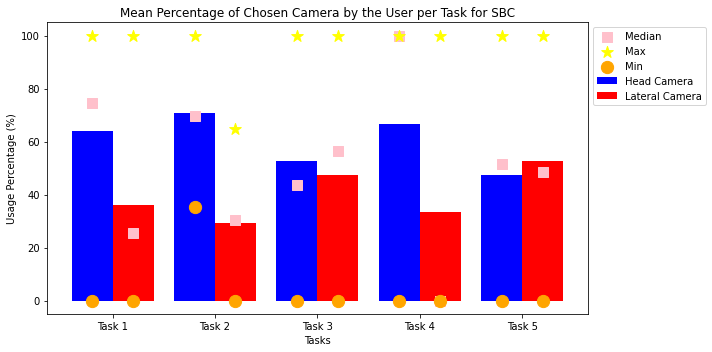

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

head_df = head_df_sbc

# Remove the "Unnamed" column if it exists (from saved CSV index)
head_df = head_df.loc[:, ~head_df.columns.str.contains('Unnamed')]

# Calculate mean percentages
mean_head_camera = head_df.mean()
mean_lateral_camera = 100 - mean_head_camera

# Calculate statistics for both Head Camera and Lateral Camera
median_head = head_df.median()
max_head = head_df.max()
min_head = head_df.min()

median_lateral = 100 - median_head
max_lateral = 100 - min_head  # Min head is max lateral
min_lateral = 100 - max_head  # Max head is min lateral

# Define x-axis labels (tasks)
tasks = mean_head_camera.index

# Define bar width
bar_width = 0.4
x = np.arange(len(tasks))  # X positions for bars

# Define common colors for markers
median_color = 'pink'
max_color = 'yellow'
min_color = 'orange'

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, mean_head_camera, width=bar_width, color='blue', label="Head Camera")
plt.bar(x + bar_width/2, mean_lateral_camera, width=bar_width, color='red', label="Lateral Camera")

# Plot statistics for both Head Camera and Lateral Camera
for i in range(len(tasks)):
    # Head Camera markers (left side)
    plt.scatter(x[i] - bar_width/2, median_head[i], marker='s', color=median_color, s=100, label="Median" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, max_head[i], marker='*', color=max_color, s=150, label="Max" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, min_head[i], marker='o', color=min_color, s=150, label="Min" if i == 0 else "", zorder=3)

    # Lateral Camera markers (right side)
    plt.scatter(x[i] + bar_width/2, median_lateral[i], marker='s', color=median_color, s=100, zorder=3)
    plt.scatter(x[i] + bar_width/2, max_lateral[i], marker='*', color=max_color, s=150, zorder=3)
    plt.scatter(x[i] + bar_width/2, min_lateral[i], marker='o', color=min_color, s=150, zorder=3)

# Add labels, title, and adjust scale
plt.xlabel("Tasks")
plt.ylabel("Usage Percentage (%)")
plt.title("Mean Percentage of Chosen Camera by the User per Task for SBC")
plt.xticks(ticks=x, labels=tasks)
plt.ylim(-5, 105)  # Extend scale slightly above 100 and below 0 to make markers fully visible

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit legend
plt.tight_layout()
plt.tight_layout()
plt.savefig("mean_camera_sbc.pdf", format='pdf')

# Show the plot
plt.show()


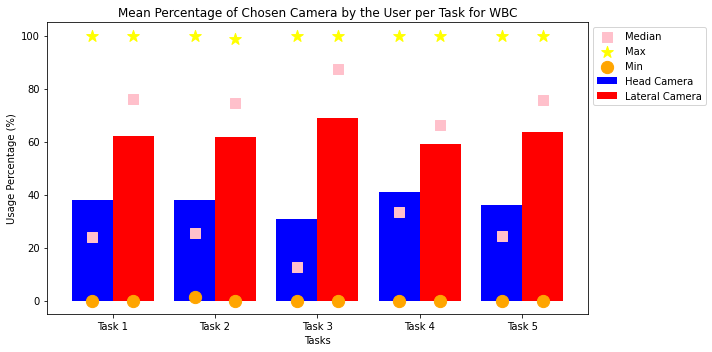

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

head_df = head_df_wbc

# Remove the "Unnamed" column if it exists (from saved CSV index)
head_df = head_df.loc[:, ~head_df.columns.str.contains('Unnamed')]

# Calculate mean percentages
mean_head_camera = head_df.mean()
mean_lateral_camera = 100 - mean_head_camera

# Calculate statistics for both Head Camera and Lateral Camera
median_head = head_df.median()
max_head = head_df.max()
min_head = head_df.min()

median_lateral = 100 - median_head
max_lateral = 100 - min_head  # Min head is max lateral
min_lateral = 100 - max_head  # Max head is min lateral

# Define x-axis labels (tasks)
tasks = mean_head_camera.index

# Define bar width
bar_width = 0.4
x = np.arange(len(tasks))  # X positions for bars

# Define common colors for markers
median_color = 'pink'
max_color = 'yellow'
min_color = 'orange'

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, mean_head_camera, width=bar_width, color='blue', label="Head Camera")
plt.bar(x + bar_width/2, mean_lateral_camera, width=bar_width, color='red', label="Lateral Camera")

# Plot statistics for both Head Camera and Lateral Camera
for i in range(len(tasks)):
    # Head Camera markers (left side)
    plt.scatter(x[i] - bar_width/2, median_head[i], marker='s', color=median_color, s=100, label="Median" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, max_head[i], marker='*', color=max_color, s=150, label="Max" if i == 0 else "", zorder=3)
    plt.scatter(x[i] - bar_width/2, min_head[i], marker='o', color=min_color, s=150, label="Min" if i == 0 else "", zorder=3)

    # Lateral Camera markers (right side)
    plt.scatter(x[i] + bar_width/2, median_lateral[i], marker='s', color=median_color, s=100, zorder=3)
    plt.scatter(x[i] + bar_width/2, max_lateral[i], marker='*', color=max_color, s=150, zorder=3)
    plt.scatter(x[i] + bar_width/2, min_lateral[i], marker='o', color=min_color, s=150, zorder=3)

# Add labels, title, and adjust scale
plt.xlabel("Tasks")
plt.ylabel("Usage Percentage (%)")
plt.title("Mean Percentage of Chosen Camera by the User per Task for WBC")
plt.xticks(ticks=x, labels=tasks)
plt.ylim(-5, 105)  # Extend scale slightly above 100 and below 0 to make markers fully visible

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit legend
plt.tight_layout()
plt.tight_layout()
plt.savefig("mean_camera_wbc.pdf", format='pdf')

# Show the plot
plt.show()
